In [2]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder


In [3]:
os.chdir("E:/1 M A B A/Mining Gan/FinaPro/FP-DataMining")
df = pd.read_csv("osi.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Data Cleaning

Pengecekan kondisi data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df = df.astype({
    'Month' : 'object',
    'OperatingSystems' : 'object',
    'Browser' : 'object',
    'Region' : 'object',
    'TrafficType' : 'object',
    'VisitorType' : 'object'
})

In [6]:
df.describe(include = "all")

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.0,12330.0,12330.0,12330.0,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,8.0,13.0,9.0,20.0,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,2.0,2.0,1.0,2.0,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,6601.0,7961.0,4780.0,3913.0,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(12330, 18)

Cek Data Duplikat

In [8]:
df.duplicated().sum()

125

In [9]:
df.shape

(12330, 18)

Drop Data Duplikat

In [10]:
df = df.drop_duplicates()

Cek NAs/ Missing data

In [11]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Data sudah lengkap, tidak ada missing value dalam data. Tidak perlu melakukan imputasi.

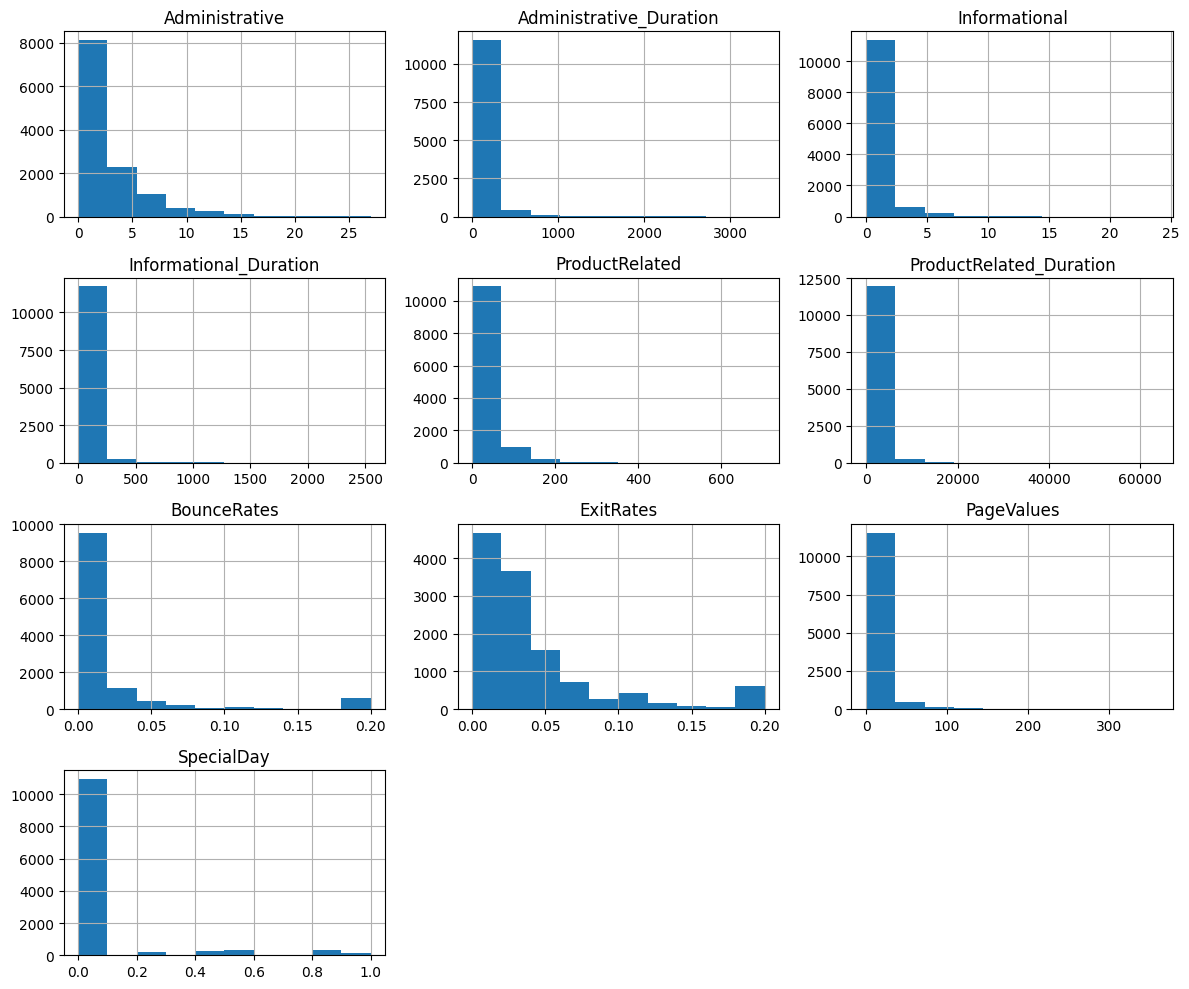

In [12]:
df.hist(figsize = (12, 10)) 
plt.tight_layout()
plt.show()

Data terlihat cukup baik dengan sebagian besar data berdistribusi eksponensial.

Cek Outlier

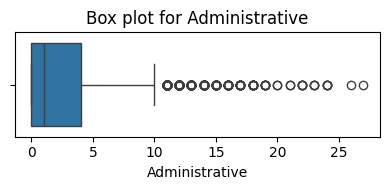

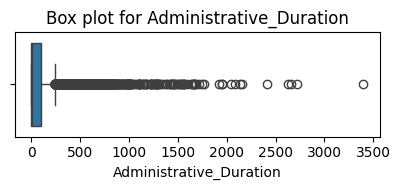

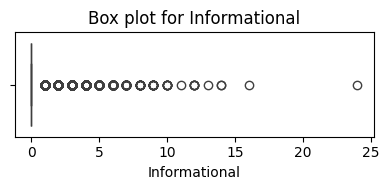

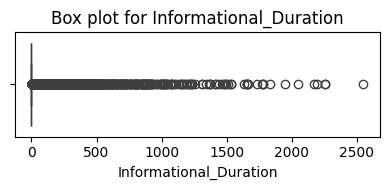

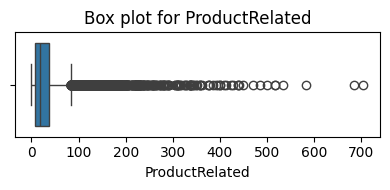

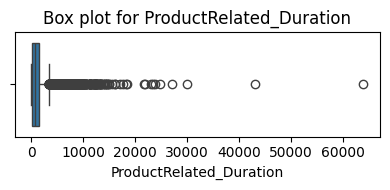

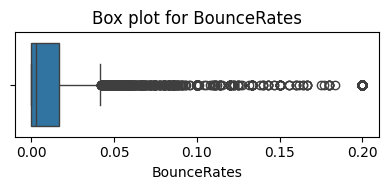

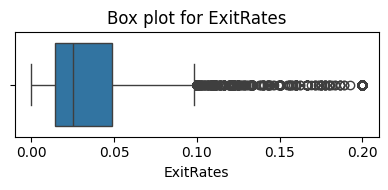

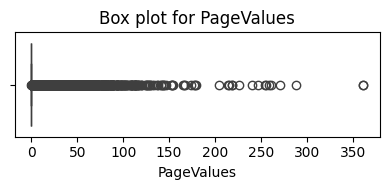

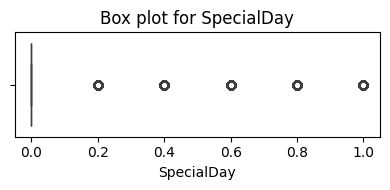

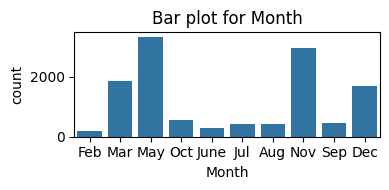

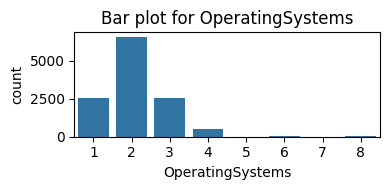

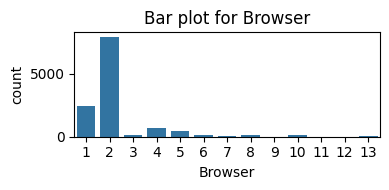

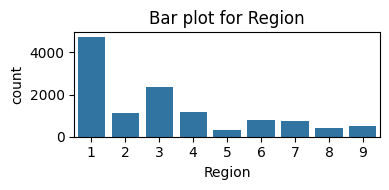

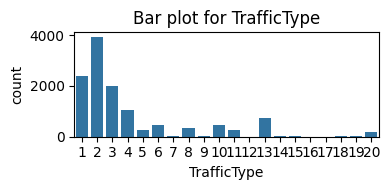

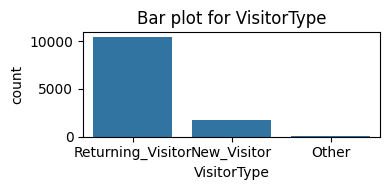

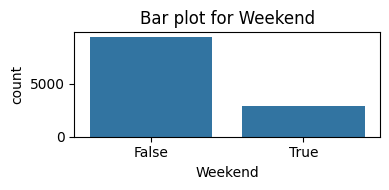

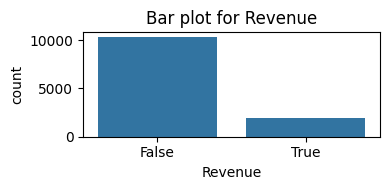

In [13]:
for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype == 'bool':  
        plt.figure(figsize = (4, 2))
        sns.countplot(x = df[column])  
        plt.title(f'Bar plot for {column}')
        plt.tight_layout()
    else:  
        plt.figure(figsize = (4, 2))
        sns.boxplot(x = df[column])  
        plt.title(f'Box plot for {column}')
        plt.tight_layout()

    plt.show()  


Beberapa data terlihat masih memiliki banyak outlier. Interquartile range atau IQR menjadi salah satu solusi untuk mengatasi hal tersebut.

- IQR

IQR for Administrative: 4.0, Upper Cap: 10.0, Lower Cap: -6.0


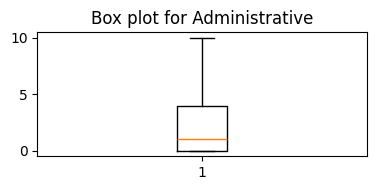

IQR for Administrative_Duration: 94.7, Upper Cap: 236.75, Lower Cap: -142.05


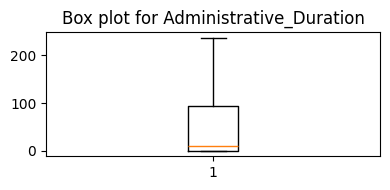

IQR for Informational: 0.0, Upper Cap: 0.0, Lower Cap: 0.0


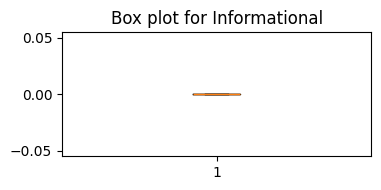

IQR for Informational_Duration: 0.0, Upper Cap: 0.0, Lower Cap: 0.0


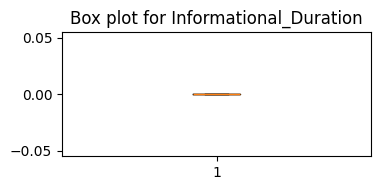

IQR for ProductRelated: 30.0, Upper Cap: 83.0, Lower Cap: -37.0


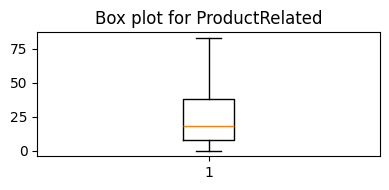

IQR for ProductRelated_Duration: 1284.154762, Upper Cap: 3403.3869049999994, Lower Cap: -1733.2321429999997


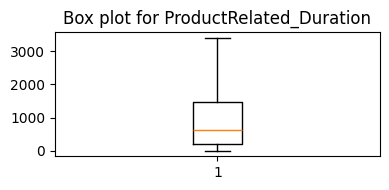

IQR for BounceRates: 0.016666667, Upper Cap: 0.041666667500000004, Lower Cap: -0.0250000005


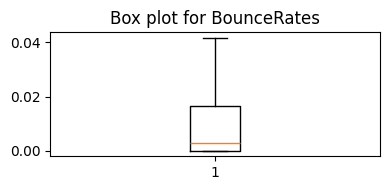

IQR for ExitRates: 0.034298439, Upper Cap: 0.0999770705, Lower Cap: -0.0372166855


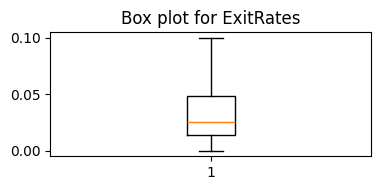

IQR for PageValues: 0.0, Upper Cap: 0.0, Lower Cap: 0.0


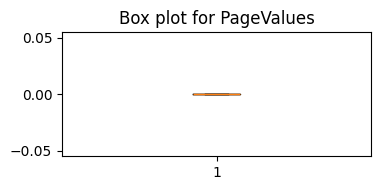

IQR for SpecialDay: 0.0, Upper Cap: 0.0, Lower Cap: 0.0


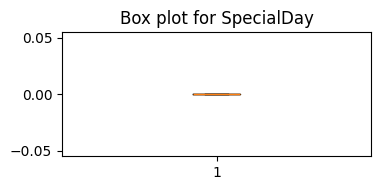

In [14]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    UC = Q3 + 1.5 * IQR  
    LC = Q1 - 1.5 * IQR  

    df[column] = np.where(
        df[column] > UC, UC,  
        np.where(df[column] < LC, LC, df[column])  
    )
    
    print(f"IQR for {column}: {IQR}, Upper Cap: {UC}, Lower Cap: {LC}")
    
    plt.figure(figsize = (4, 2))
    plt.boxplot(df[column])
    plt.title(f'Box plot for {column}')
    plt.tight_layout()
    plt.show()

for column in df.select_dtypes(include = ['float64', 'int64']).columns:
    handle_outliers(df, column)

Outlier sudah tidak terlihat, yang kemudian bisa kita cek kembali menggunakan Z-Score

- Z-Score

In [15]:
ab = df.copy()
ab

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.041667,0.099977,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.099977,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.041667,0.099977,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.041667,0.099977,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,0.0,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.0,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.041667,0.086667,0.0,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.0,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [16]:
from scipy import stats
threshold = 3.0

for column in ab.select_dtypes(include = ['float64', 'int64']).columns:
    zscore_column = f'z_score_{column}'  
    ab[zscore_column] = stats.zscore(ab[column])  
    
    ab[column] = np.where(
        np.abs(ab[zscore_column]) > threshold,
        np.where(ab[zscore_column] > threshold,
                 ab[column].mean() + threshold * ab[column].std(),
                 ab[column].mean() - threshold * ab[column].std()),
        ab[column]
    )
    
    print(f"Outlier treatment for '{column}':")
    print(ab[[column, zscore_column]].head())  
    print()  

Outlier treatment for 'Administrative':
   Administrative  z_score_Administrative
0             0.0               -0.757883
1             0.0               -0.757883
2             0.0               -0.757883
3             0.0               -0.757883
4             0.0               -0.757883

Outlier treatment for 'Administrative_Duration':
   Administrative_Duration  z_score_Administrative_Duration
0                      0.0                        -0.721911
1                      0.0                        -0.721911
2                      0.0                        -0.721911
3                      0.0                        -0.721911
4                      0.0                        -0.721911

Outlier treatment for 'Informational':
   Informational  z_score_Informational
0            0.0                    NaN
1            0.0                    NaN
2            0.0                    NaN
3            0.0                    NaN
4            0.0                    NaN

Outlier treatment

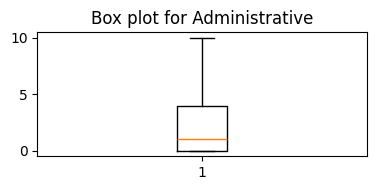

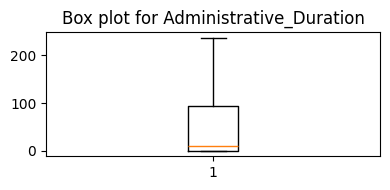

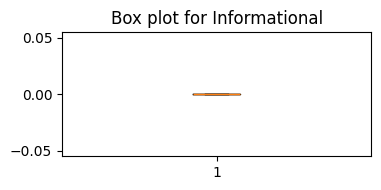

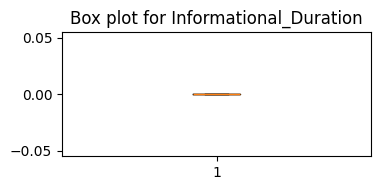

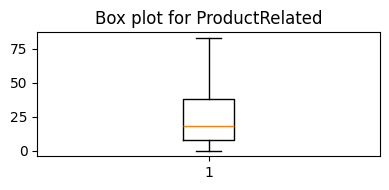

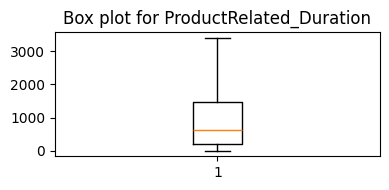

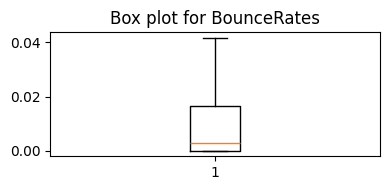

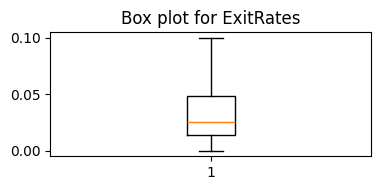

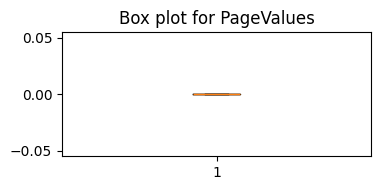

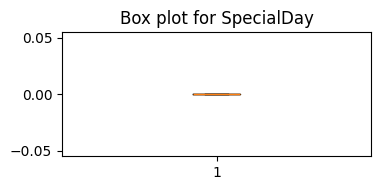

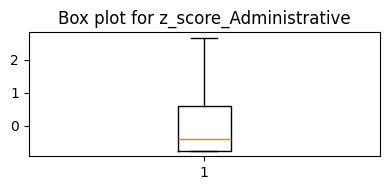

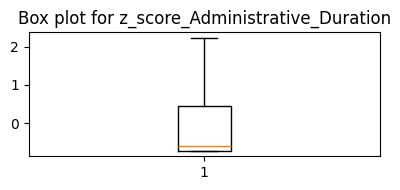

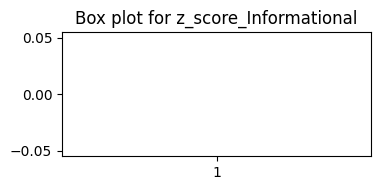

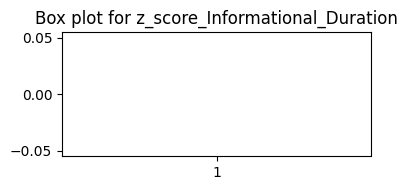

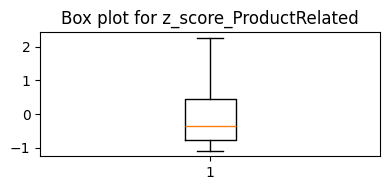

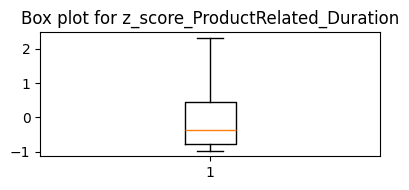

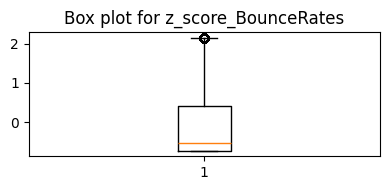

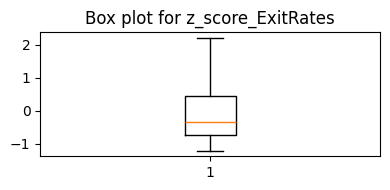

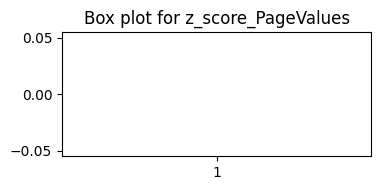

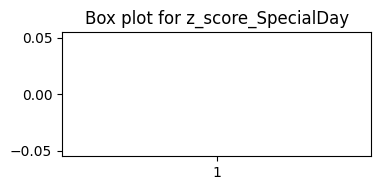

In [17]:
for column in ab.select_dtypes(include = ['float64', 'int64']).columns:
    plt.figure(figsize = (4, 2))
    plt.boxplot(ab[column])
    plt.title(f'Box plot for {column}')
    plt.tight_layout()
    plt.show()

Terlihat outlier yang tersisa sudah sisa sedikit, hal ini menandakan bahwa data sudah sebagian bersih dari outlier yang ada.

In [24]:
df[df['Month'] == 'Jan']


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
